In [11]:
import numpy as np
import os
import glob
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/connectivity_matrices/',p[i]+'/tracto_op_2_Lest/connectivity_matrices/']
    d[i] = a

all_mod = {}
all_gb = {}
all_cpl = {}
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__tot_commit2_weights.npy'):
            tot = d[i][0] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                gb = eng.compute_gb(tot)
        if f.endswith('__len.npy'):
            clen = d[i][0] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)
    
    for l in os.listdir(d[i][1]):
        if l.endswith('__tot_commit2_weights.npy'):
            tot1 = d[i][1]  + l
            if os.path.exists(tot1):
                mod1 = eng.compute_mod(tot1)
                gb1 = eng.compute_gb(tot1)
        if l.endswith('__len.npy'):
            clen1 = d[i][1] + l
            if os.path.exists(clen1):
                cpl1 = eng.compute_cpl(clen1)

    all_mod[i] = [mod, mod1]
    all_gb[i] = [gb, gb1]
    all_cpl[i] = [cpl, cpl1]
    mod = np.nan
    mod1 = np.nan
    gb = np.nan
    gb1 = np.nan
    cpl = np.nan
    cpl1 = np.nan
eng.quit()


In [ ]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*/tracto_op_?_est/connectivity_matrices/'):
    p.append(path)
p.sort()

In [ ]:
# df = pd.DataFrame(columns=['subj'])
subj_list = []
sess_list = []
scan_list = []
mod_list = []
cpl_list = []
ge_list = []

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')

for i in range(len(p)):
    subj_list.append(p[i].split('/')[7])
    if p[i].split('/')[7] == p[i-2].split('/')[7]:
        sess_list.append('2')
    else:
        sess_list.append('1')
    scan_list.append(p[i].split('/')[9].split('_')[2])
    
    
    for f in os.listdir(p[i]):
        
        if f.endswith('__tot_commit2_weights.npy'):
            tot = p[i] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                ge = eng.compute_gb(tot)
            else:
                mod = nan
                ge = nan
        
        
        if f.endswith('__len.npy'):
            clen = p[i] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)

            else:
                cpl = nan
    mod_list.append(mod)
    ge_list.append(ge)
    cpl_list.append(cpl)
                    
    
df = pd.DataFrame(subj_list, columns=['subj'])
df['sess'] = sess_list
df['scan'] = scan_list

In [ ]:
df['mod'] = mod_list
df['ge'] = ge_list
df['cpl'] = cpl_list

In [ ]:
df

In [12]:
diff = []
data1mod = []
data2mod = []
for i in all_mod:
    data1mod.append(all_mod[i][0])
    data2mod.append(all_mod[i][1])
    diff.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )

In [ ]:
data1mod

In [3]:
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data

,Unnamed: 0,participant_id,session_id,sex,age,handedness
0,51,cIVs001,s1Bx2,b,x,right
1,52,cIVs001,s1Bx3,b,^,right
2,53,cIVs002,s1Bx2,r,^,right
3,54,cIVs005,s1Bx2,r,x,right
4,55,cIVs005,s1Bx3,r,^,right
...,...,...,...,...,...,...
113,164,cIVs102,s1Bx1,b,x,right
114,165,cIVs104,s1Bx1,r,x,right
115,166,cIVs108,s1Bx1,b,x,right
116,167,cIVs109,s1Bx1,b,x,right


In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(range(118),diff)
plt.xlabel('No. of sessions')
plt.ylabel('Percent diff in Modularity')
plt.title('Percent diff in Modularity in Scan rescan')
plt.rcParams.update({'font.size':20})

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(diff)
plt.ylabel('Percent diff in Modularity')
plt.title('Percent diff in Modularity in Scan rescan')
plt.rcParams.update({'font.size':20})

In [4]:
def bland_altman_plot_xaxis_age(data1, data2, labels, age, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    for i in range(len(mean)):
        plt.scatter( age[i],diff[i],c=labels[i],s=90, *args, **kwargs)
    legend_element = [Line2D([0],[0], marker='o',color='b',label='Male',markersize=8,linestyle='None'),
                      Line2D([0],[0], marker='o',color='r',label='Female',markersize=8,linestyle='None')]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
       

In [ ]:
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
plt.figure(figsize=(15,12))
bland_altman_plot_xaxis_age(data1mod,data2mod,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for modularity with L(r) corruption',fontsize=25)
plt.xlabel('Age',fontsize=25)
plt.ylabel('Difference',fontsize=25)
# plt.rcParams.update({'font.size':25})

In [5]:
def bland_altman_plot(data1, data2, labels, sym, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.nanmean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.nanmean(diff)                   # Mean of the difference
    sd        = np.nanstd(diff, axis=0)            # Standard deviation of the difference
    print(diff)
    for i in range(len(sym)):
        plt.scatter(mean[i], diff[i], c=labels[i], marker=sym[i], s=120, *args, **kwargs)
    
    legend_element = [Line2D([0],[0], lw=4,color='b',label='Male',markersize=8),
                      Line2D([0],[0], lw=4,color='r',label='Female',markersize=8),
                     Line2D([],[], marker='o',color='k',label='Age 5 - 5.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='x',color='k',label='Age 6 - 6.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='^',color='k',label='Age 7 - 7.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='+',color='k',label='Age 8 - 8.9',linestyle='None',markersize=10)]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
       

/home/local/VANDERBILT/kanakap/miniconda3/envs/gradten/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


[-2.06861933e-02 -2.10018775e-01  1.98471966e-01 -2.77479711e-03
  1.29092393e-03  2.66677193e-01  6.73930569e-03  1.28147604e-02
 -7.33176576e-02  2.19067071e-03  7.22671042e-03  2.19576312e-01
  1.05356041e-02  1.04962159e-01  8.03497801e-04 -9.59614656e-02
 -1.26594603e-02  2.13330025e-01 -1.18202078e-01  3.90509050e-02
  2.79769033e-02 -2.51775231e-03  3.45660173e-03 -2.45165420e-01
  1.14149338e-01  2.12190116e-01  2.28329742e-03  1.22955878e-01
 -1.73383193e-01  2.31332167e-01  1.00984281e-01  1.76238398e-02
 -4.41413430e-03  2.96171007e-05  1.50957823e-02  1.98680404e-01
 -6.15667227e-03  4.97044685e-03  3.52795118e-03  1.91587385e-01
  2.44226669e-01 -5.82428604e-02 -1.15281932e-02  7.13550897e-03
  2.06532056e-01  3.35808241e-03 -5.77162278e-04  2.33598601e-03
 -6.53268251e-03  2.71705797e-02  1.26441722e-02  5.24970371e-04
  6.31545099e-04  2.38069146e-03 -1.20324558e-01 -2.23199441e-03
  1.20176465e-02  2.31125731e-03  1.16221476e-03 -4.55602351e-04
  1.59837657e-01 -3.96320

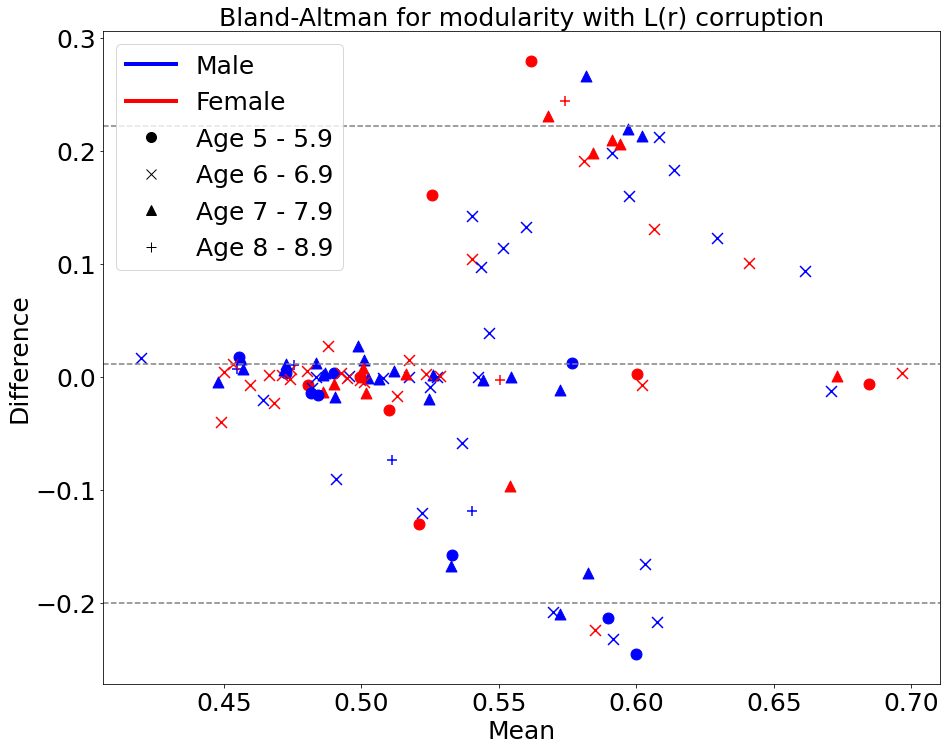

In [14]:
from matplotlib.lines import Line2D 
plt.figure(figsize=(15,12))
bland_altman_plot(data1mod,data2mod,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for modularity with L(r) corruption',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# data = sm.datasets.get_rdataset("dietox", "geepack").data
vc = {'sess': '0 + C(sess)','scan':'0 + C(scan)'}
md = sm.MixedLM.from_formula("mod ~ 1 ", vc_formula=vc,re_formula="1",data=df, groups="subj")
mdf = md.fit()
print(mdf.summary())

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(all_mod)
df = df.transpose()
print(df[0].sub(df[1]))
print(diff)

In [15]:
diff = []
data1gb = []
data2gb = []
for i in all_gb:
    data1gb.append(all_gb[i][0])
    data2gb.append(all_gb[i][1])
    diff.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    #diff.append(all_gb[i][0] - all_gb[i][1])
# plt.figure(figsize=(10,8))
# plt.scatter(range(118),diff)
# plt.xlabel('No. of sessions')
# plt.ylabel('Percent diff in Global efficiency')
# plt.title('Percent diff in  Global efficiency in Scan rescan')
# plt.rcParams.update({'font.size':20})

[ 4.13911722e-04  2.29586160e-02 -1.25805195e-02 -3.03546914e-03
 -1.34429495e-03 -1.37084320e-02  4.75961544e-04 -5.94793400e-03
 -9.03816660e-03 -5.56439166e-03 -1.20036459e-03 -2.40598246e-02
 -6.40010812e-03 -1.27207488e-02 -5.36495249e-03  1.71069873e-03
 -1.42994558e-03 -1.30993828e-02  1.06476634e-02 -1.20730903e-02
  3.36774848e-03 -4.82641190e-04  5.13702362e-03  1.50193041e-02
 -1.44395824e-02 -1.44661208e-02 -1.82891922e-03 -1.23961177e-02
 -8.13874593e-04 -6.33485318e-03 -1.11128096e-02  9.79646976e-03
  1.27623979e-02 -1.73889645e-03 -4.65118012e-03 -1.09935929e-02
  4.23860966e-03  6.76620022e-04  3.93666628e-03 -2.86664221e-02
 -1.71968770e-02 -3.76776127e-05  1.85084883e-02 -5.98179654e-03
  5.46588222e-03  4.58855141e-03 -5.35651956e-03  3.78800221e-03
 -8.00202884e-03  3.23462848e-03  3.67861964e-03  1.07532638e-04
 -1.90202140e-03 -1.60559923e-02 -6.32706806e-03 -8.41362029e-05
 -9.64112000e-03  2.18387195e-03  8.15151317e-04 -1.21242078e-03
 -2.74585447e-02  1.39420

/home/local/VANDERBILT/kanakap/miniconda3/envs/gradten/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


Text(0, 0.5, 'Difference')

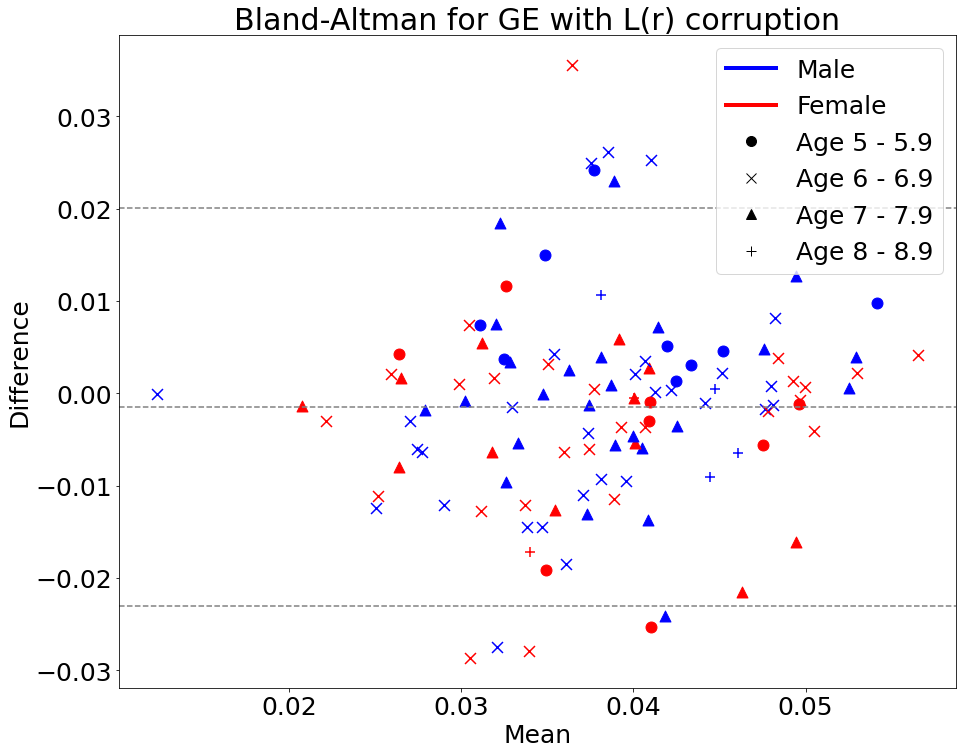

In [17]:
from matplotlib.lines import Line2D 
plt.figure(figsize=(15,12))
bland_altman_plot(data1gb,data2gb,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for GE with L(r) corruption')
plt.xlabel('Mean')
plt.ylabel('Difference')

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(diff)
plt.ylabel('Percent diff in Global efficiency')
plt.title('Percent diff in  Global efficiency in Scan rescan')
plt.rcParams.update({'font.size':20})

In [18]:
diff = []
data1cpl = []
data2cpl = []
for i in all_cpl:
    data1cpl.append(all_cpl[i][0])
    data2cpl.append(all_cpl[i][1])
    diff.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )
# plt.figure(figsize=(10,8))
# plt.scatter(range(118),diff)
# plt.xlabel('No. of sessions')
# plt.ylabel('Percent diff in CPL')
# plt.title('Percent diff in  CPL in Scan rescan')
# plt.rcParams.update({'font.size':20})

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(diff)
plt.ylabel('Percent diff in CPL')
plt.title('Percent diff in  CPL in Scan rescan')
plt.rcParams.update({'font.size':20})

/home/local/VANDERBILT/kanakap/miniconda3/envs/gradten/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


[-7.66562945e-01 -4.51878587e+00  1.89044396e+01  2.84569040e+00
  5.62958429e-01  1.08682232e+00 -6.83771340e-01 -2.73885487e+00
  1.40594726e+01  3.00883215e-01 -5.91301028e-03  2.00309615e+01
  4.42528216e-01 -6.42692856e+00  7.49458559e-01  3.98560508e+00
 -4.35202544e-01  4.38157211e+00  6.50845143e+00  2.27162494e+00
  1.51954889e+00 -5.60469452e-01 -2.17716292e-01 -8.90269887e+00
 -7.08010862e+00  6.21640954e-01 -4.48660878e-02  1.11031623e+00
 -1.31766154e+01  2.13548943e+01  6.25873098e+00  2.03188111e-01
  1.40309576e+00 -6.84494616e-01 -6.85777238e-02  9.11986950e+00
  4.53900839e+00  3.92959573e-01  7.63955115e-01  8.56032132e+00
  1.24108080e+01  1.66527094e+01 -6.14638606e+00 -2.74218468e-01
  9.14369858e+00  6.30178418e-02 -3.35218884e-01 -1.78611908e+00
 -6.90008751e-01  5.53170776e-01  4.66563969e-01  1.97747657e+00
  6.86237283e-01  4.43854403e-01  1.45733206e+01  2.02240408e+00
 -1.20616158e-01 -1.52867305e+00 -1.37632733e+00 -2.33440654e+00
  7.56357481e+00  2.28701

Text(0, 0.5, 'Difference')

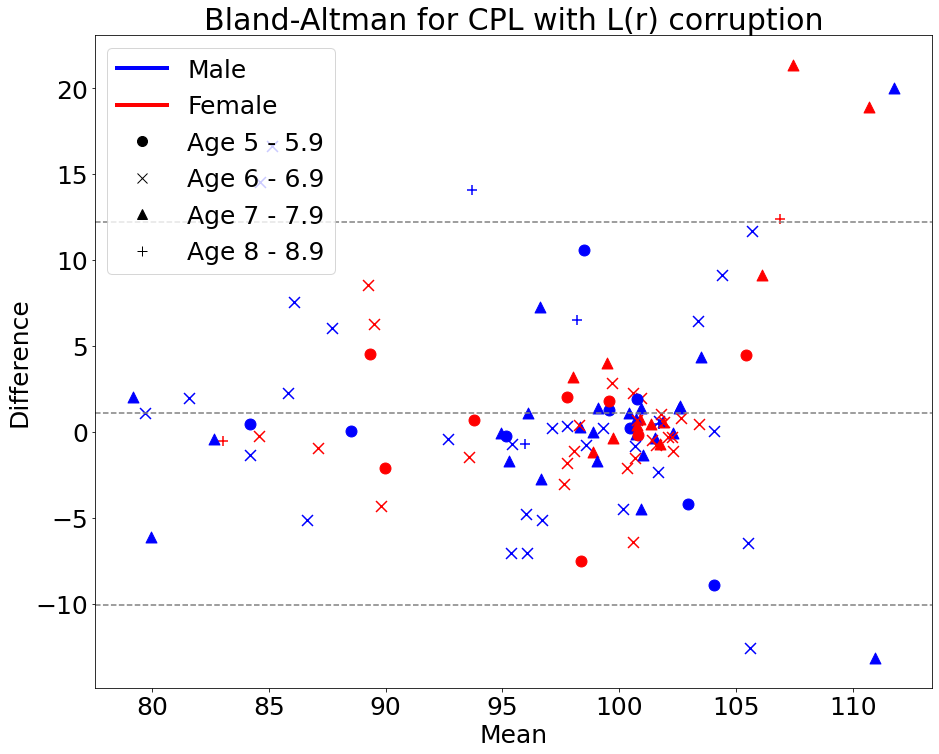

In [19]:
plt.figure(figsize=(15,12))
bland_altman_plot(data1cpl,data2cpl,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for CPL with L(r) corruption')
plt.xlabel('Mean')
plt.ylabel('Difference')

In [ ]:
def cov_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    std       = np.std([data1, data2], axis=0)                  # Difference between data1 and data2
    cov        = (std / mean)  * 100                # Mean of the difference
    return cov

In [ ]:
cov_mod = cov_cal(data1mod,data2mod)
cov_ge = cov_cal(data1ge,data2ge)
cov_cpl = cov_cal(data1cpl,data2cpl)